# **Set up the environment**
**Install the required libraries**

Pandas

Numpy

Matplotlib

Seaborn

Scikit-Learn

In [46]:
pip install pandas numpy matplotlib seaborn scikit-learn

# **Import the required libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load and Explore Dataset**

**Here we import the sample dataset to python and assign it to data variable**

In [54]:
df = pd.read_csv('/content/drive/MyDrive/ML Datasets/Phone Pricing dataset.csv')

**A quick look into the data**

Gives general information about the number of data and the type of data

In [55]:
print(df.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [57]:
print(df['price_range'].value_counts())  # 0: low, 1: medium, 2: high, 3: very high

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


# **Preprocess Data**

**Check for missing values**

**Normalize or scale features**

**Encode if necessary**

In [58]:
# No missing values in this dataset, but check:
print(df.isnull().sum())

# Feature and label split
X = df.drop('price_range', axis=1)
y = df['price_range']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# **Train-Test Split**

**Split the data 80 percent for training and 20 percent for testing**

**Write random_state=42 because if you rerun code, it splits by using same rule**

**As a result of using random_state=42, we can get same accuracy.**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# **Training Models**

**Linear Regression**

In [60]:
from sklearn.linear_model import LinearRegression   # Here we import and use linear regression to make and test model.
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = np.clip(np.round(linreg.predict(X_test)), 0, 3).astype(int)
# score predicts and gives the accuracy of model
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Linear Regression Accuracy: 0.91


**Random Forest Classifier**

In [61]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)   # Here we import and use random forest classifier to make and test model.
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
# score predicts and gives the accuracy of model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8925


**Gradient Boosting Classifier**

In [63]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)   # Here we import and use gradient boosting classifier to make and test model.
gbc.fit(X_train, y_train)
y_pred_gb = gbc.predict(X_test)
# score predicts and gives the accuracy of model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.905


# **Evaluating Models And Creating Confusion Matrix**

In [64]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**Linear Regression**


Linear Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       105
           1       0.88      0.99      0.93        91
           2       0.79      0.99      0.88        92
           3       1.00      0.79      0.89       112

    accuracy                           0.91       400
   macro avg       0.92      0.92      0.91       400
weighted avg       0.93      0.91      0.91       400



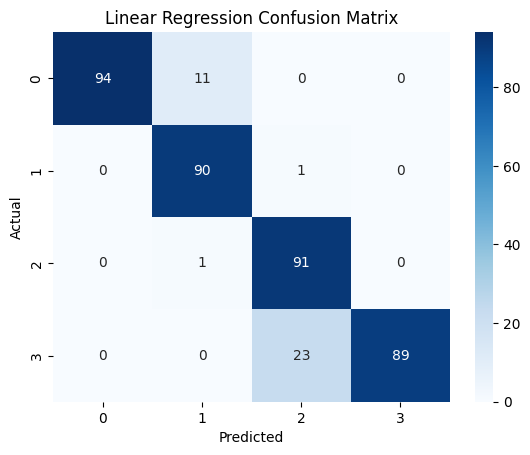

In [65]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")

**Random Forest**


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



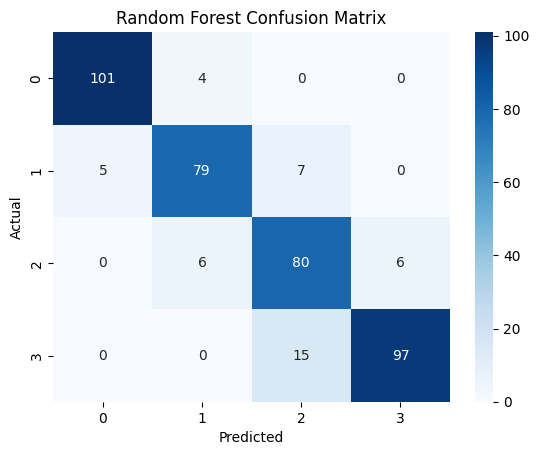

In [66]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

**Gradient Boosting**


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.89      0.89        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



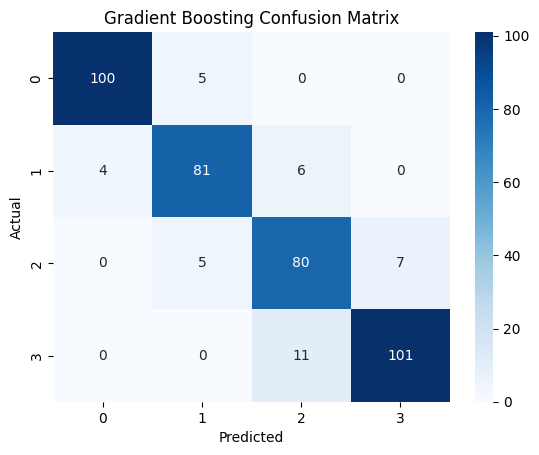

In [67]:
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# **Visualizing Feature Importance**

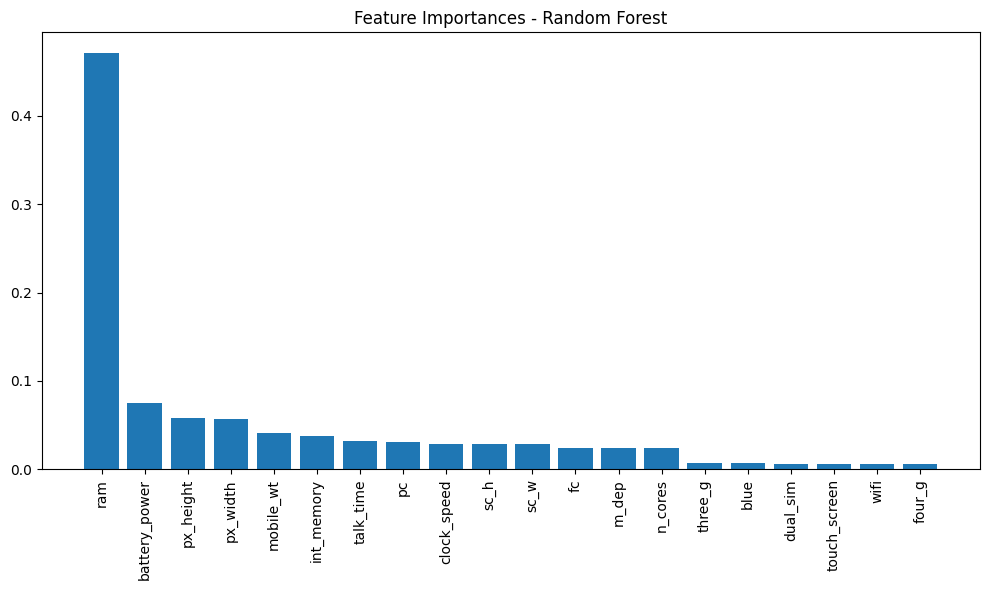

In [68]:
importances = rfc.feature_importances_   # Bar chart that shows the importance of features of a mobile phone
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# **Predicting for a New Mobile**

**Here we are predicting the price category of a new mobile phone**

# **Prediction 1**

In [69]:
sample = pd.DataFrame({
    'battery_power': [1099],
    'blue': [0],
    'clock_speed': [0.5],
    'dual_sim': [0],
    'fc': [13],
    'four_g': [1],
    'int_memory': [61],
    'm_dep': [0.3],
    'mobile_wt': [146],
    'n_cores': [3],
    'pc': [20],
    'px_height': [393],
    'px_width': [1096],
    'ram': [2101],
    'sc_h': [17],
    'sc_w': [10],
    'talk_time': [3],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1099     0          0.5         0  13       1          61    0.3        146        3  20        393      1096 2101    17    10          3        1             1     1                Medium


# **Prediction 2**

In [70]:
sample = pd.DataFrame({
    'battery_power': [512],
    'blue': [1],
    'clock_speed': [0.5],
    'dual_sim': [1],
    'fc': [7],
    'four_g': [0],
    'int_memory': [15],
    'm_dep': [0.9],
    'mobile_wt': [83],
    'n_cores': [3],
    'pc': [15],
    'px_height': [249],
    'px_width': [1849],
    'ram': [3038],
    'sc_h': [18],
    'sc_w': [14],
    'talk_time': [15],
    'three_g': [0],
    'touch_screen': [1],
    'wifi': [1]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
           512     1          0.5         1   7       0          15    0.9         83        3  15        249      1849 3038    18    14         15        0             1     1                  High


# **Prediction 3**

In [71]:
sample = pd.DataFrame({
    'battery_power': [571],
    'blue': [1],
    'clock_speed': [2],
    'dual_sim': [1],
    'fc': [5],
    'four_g': [1],
    'int_memory': [58],
    'm_dep': [0.6],
    'mobile_wt': [101],
    'n_cores': [6],
    'pc': [11],
    'px_height': [31],
    'px_width': [1536],
    'ram': [1150],
    'sc_h': [19],
    'sc_w': [10],
    'talk_time': [11],
    'three_g': [1],
    'touch_screen': [0],
    'wifi': [1]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
           571     1            2         1   5       1          58    0.6        101        6  11         31      1536 1150    19    10         11        1             0     1                   Low


# **Prediction 4**

In [72]:
sample = pd.DataFrame({
    'battery_power': [1939],
    'blue': [1],
    'clock_speed': [2.8],
    'dual_sim': [1],
    'fc': [0],
    'four_g': [1],
    'int_memory': [55],
    'm_dep': [0.6],
    'mobile_wt': [199],
    'n_cores': [4],
    'pc': [10],
    'px_height': [320],
    'px_width': [520],
    'ram': [3817],
    'sc_h': [14],
    'sc_w': [10],
    'talk_time': [18],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [0]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1939     1          2.8         1   0       1          55    0.6        199        4  10        320       520 3817    14    10         18        1             1     0             Very High


# **Prediction 5**

In [73]:
sample = pd.DataFrame({
    'battery_power': [1983],
    'blue': [1],
    'clock_speed': [0.5],
    'dual_sim': [1],
    'fc': [3],
    'four_g': [0],
    'int_memory': [43],
    'm_dep': [1],
    'mobile_wt': [87],
    'n_cores': [6],
    'pc': [10],
    'px_height': [349],
    'px_width': [676],
    'ram': [2082],
    'sc_h': [9],
    'sc_w': [4],
    'talk_time': [3],
    'three_g': [0],
    'touch_screen': [1],
    'wifi': [1]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1983     1          0.5         1   3       0          43      1         87        6  10        349       676 2082     9     4          3        0             1     1                Medium


# **Prediction 6**

In [74]:
sample = pd.DataFrame({
    'battery_power': [1168],
    'blue': [0],
    'clock_speed': [1.3],
    'dual_sim': [0],
    'fc': [9],
    'four_g': [0],
    'int_memory': [61],
    'm_dep': [0.1],
    'mobile_wt': [90],
    'n_cores': [8],
    'pc': [10],
    'px_height': [159],
    'px_width': [1578],
    'ram': [2941],
    'sc_h': [9],
    'sc_w': [4],
    'talk_time': [17],
    'three_g': [0],
    'touch_screen': [0],
    'wifi': [1]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1168     0          1.3         0   9       0          61    0.1         90        8  10        159      1578 2941     9     4         17        0             0     1                  High


# **Prediction 7**

In [75]:
sample = pd.DataFrame({
    'battery_power': [911],
    'blue': [0],
    'clock_speed': [1.4],
    'dual_sim': [1],
    'fc': [3],
    'four_g': [0],
    'int_memory': [14],
    'm_dep': [0.7],
    'mobile_wt': [199],
    'n_cores': [4],
    'pc': [4],
    'px_height': [1563],
    'px_width': [1692],
    'ram': [1179],
    'sc_h': [16],
    'sc_w': [3],
    'talk_time': [11],
    'three_g': [0],
    'touch_screen': [1],
    'wifi': [0]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
           911     0          1.4         1   3       0          14    0.7        199        4   4       1563      1692 1179    16     3         11        0             1     0                Medium


# **Prediction 8**

In [76]:
sample = pd.DataFrame({
    'battery_power': [1131],
    'blue': [1],
    'clock_speed': [0.5],
    'dual_sim': [1],
    'fc': [11],
    'four_g': [0],
    'int_memory': [49],
    'm_dep': [0.6],
    'mobile_wt': [101],
    'n_cores': [5],
    'pc': [18],
    'px_height': [658],
    'px_width': [878],
    'ram': [3961],
    'sc_h': [19],
    'sc_w': [13],
    'talk_time': [16],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [0]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1131     1          0.5         1  11       0          49    0.6        101        5  18        658       878 3961    19    13         16        1             1     0             Very High


# **Prediction 9**

In [77]:
sample = pd.DataFrame({
    'battery_power': [502],
    'blue': [0],
    'clock_speed': [1.5],
    'dual_sim': [1],
    'fc': [7],
    'four_g': [0],
    'int_memory': [37],
    'm_dep': [0.2],
    'mobile_wt': [199],
    'n_cores': [2],
    'pc': [12],
    'px_height': [705],
    'px_width': [1810],
    'ram': [2086],
    'sc_h': [6],
    'sc_w': [1],
    'talk_time': [14],
    'three_g': [0],
    'touch_screen': [1],
    'wifi': [0]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
           502     0          1.5         1   7       0          37    0.2        199        2  12        705      1810 2086     6     1         14        0             1     0                Medium


# **Prediction 10**

In [78]:
sample = pd.DataFrame({
    'battery_power': [1928],
    'blue': [1],
    'clock_speed': [1.8],
    'dual_sim': [0],
    'fc': [9],
    'four_g': [1],
    'int_memory': [19],
    'm_dep': [1],
    'mobile_wt': [187],
    'n_cores': [3],
    'pc': [20],
    'px_height': [691],
    'px_width': [1580],
    'ram': [3015],
    'sc_h': [7],
    'sc_w': [2],
    'talk_time': [13],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [1]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1928     1          1.8         0   9       1          19      1        187        3  20        691      1580 3015     7     2         13        1             1     1             Very High


# **Prediction 11**

In [79]:
sample = pd.DataFrame({
    'battery_power': [1883],
    'blue': [0],
    'clock_speed': [1.6],
    'dual_sim': [0],
    'fc': [9],
    'four_g': [0],
    'int_memory': [24],
    'm_dep': [0.1],
    'mobile_wt': [87],
    'n_cores': [1],
    'pc': [16],
    'px_height': [203],
    'px_width': [915],
    'ram': [1175],
    'sc_h': [17],
    'sc_w': [10],
    'talk_time': [3],
    'three_g': [0],
    'touch_screen': [0],
    'wifi': [0]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
          1883     0          1.6         0   9       0          24    0.1         87        1  16        203       915 1175    17    10          3        0             0     0                   Low


# **Prediction 12**

In [80]:
sample = pd.DataFrame({
    'battery_power': [563],
    'blue': [1],
    'clock_speed': [0.5],
    'dual_sim': [1],
    'fc': [2],
    'four_g': [1],
    'int_memory': [49],
    'm_dep': [0.9],
    'mobile_wt': [145],
    'n_cores': [5],
    'pc': [6],
    'px_height': [1263],
    'px_width': [1716],
    'ram': [3993],
    'sc_h': [11],
    'sc_w': [2],
    'talk_time': [9],
    'three_g': [1],
    'touch_screen': [1],
    'wifi': [0]  })   # Sample Mobile Details
sample_scaled = scaler.transform(sample)   # Scale the input
prediction = gbc.predict(sample_scaled)[0]   # Predict using trained model
price_map = {
    0: "Low",
    1: "Medium",
    2: "High",
    3: "Very High"  }   # Map numeric prediction to category
sample['Predicted Price Range'] = price_map[prediction]   # Add prediction to DataFrame
print("\nMobile Data with Prediction:")   # Display full mobile data with prediction
print(sample.to_string(index=False))


Mobile Data with Prediction:
 battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  pc  px_height  px_width  ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi Predicted Price Range
           563     1          0.5         1   2       1          49    0.9        145        5   6       1263      1716 3993    11     2          9        1             1     0             Very High
